In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import h2o

#specify 1GB max size for H2O
h2o.init(max_mem_size="1G")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode, sharing)


C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ADITYA~1\AppData\Local\Temp\tmphk8pd7mw
  JVM stdout: C:\Users\ADITYA~1\AppData\Local\Temp\tmphk8pd7mw\h2o_Aditya_Jain_started_from_python.out
  JVM stderr: C:\Users\ADITYA~1\AppData\Local\Temp\tmphk8pd7mw\h2o_Aditya_Jain_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_Aditya_Jain_3ct6ke
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,989 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('http://coursera.h2o.ai/cacao.882.csv',
                      destination_frame='coursera')

train, valid, test = data.split_frame([0.8,0.1], seed=100)
print ('Number of rows train (%d), validation (%d) and test (%d)'%(train.nrows, valid.nrows, test.nrows))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows train (1430), validation (189) and test (176)


### Step 1: Exploratory Data Analysis

### 1.1 - Print variable names

In [4]:
data.names

['Maker',
 'Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Maker Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

### 1.2 - Print Summary of Data

In [5]:
data.summary()

,Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
type,enum,enum,int,int,real,enum,real,enum,enum
mins,,,5.0,2006.0,0.42,,1.0,,
mean,,,1035.9047353760463,2012.325348189414,0.7169832869080772,,3.185933147632313,,
maxs,,,1952.0,2017.0,1.0,,5.0,,
sigma,,,552.8863650101442,2.92721027766861,0.0632311833842919,,0.4780623935863306,,
zeros,,,0,0,0,,0,,
missing,0,0,0,0,0,0,0,1,1
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,Â,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Â,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.7,France,3.0,Â,Togo


### 1.3 - > Evaluate data distribution of target variable

 - Ratings seem to be normally distributed so need to specify a different 'distribution'

In [6]:
#what we want to predict
y = 'Rating'
seed = 99

#fields which we may not have while doing prediction.
ignoreFields = [""]

#all fields minus those which we would not have during predictions
xAll = [i for i in train.names if i not in ignoreFields]

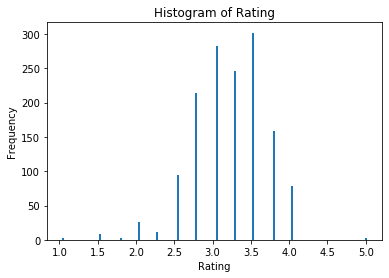

In [7]:
train[y].hist(150)

### 1.4 ->Evaluate the levels for training data and see if there are any fields which can be dropped

    - None in this case

In [8]:
print (train.nlevels())

# this gives the different values of attribute
train.structure()

[415, 1039, 1, 0, 0, 59, 1, 40, 100]
H2OFrame: 'py_2_sid_873d' 
Dimensions: 1430 obs. of 9 variables
$ Maker          :  Factor w/ 415 level(s) "A. Morin","AMMA","Acalli","Adi","Aequare (Gianduja)","Ah Cacao","Akesson's (Pralus)","Alain Ducasse","Alexandre","Altus aka Cao Artisan","Amano","Amatller (Simon Coll)","Amazona","Ambrosia","Amedei","Anahata","Animas","Ara","Arete","Artisan du Chocolat","Artisan du Chocolat (Casa Luker)","Askinosie","Bahen & Co.","Bakau","Bar Au Chocolat","Baravelli's","Batch","Beau Cacao","Beehive","Belcolade","Bellflower","Belyzium","Benoit Nihant","Bernachon","Beschle (Felchlin)","Bisou","Bittersweet Origins","Black Mountain","Black River (A. Morin)","Blanxart","Blue Bandana","Bonnat","Bouga Cacao (Tulicorp)","Bowler Man","Brasstown aka It's Chocolate","Brazen","Breeze Mill","Bright","Britarev","Bronx Grrl Chocolate","Burnt Fork Bend","C-Amaro","Cacao Arabuco","Cacao Atlanta","Cacao Barry","Cacao Hunters","Cacao Market","Cacao Prieto","Cacao Sampaka","Cacao

$ Origin         :  Factor w/ 1039 level(s) "heirloom"","100 percent","2009 Hapa Nibby","A case of the Xerces Blues, triple roast","ABOCFA Coop","Abinao","Abstract S. w/ Jamaica nibs,batch abs60323.0","Acarigua, w/ nibs","Acopagro","Acul-du-Nord, 2015","Africa","Africa meets Latina","AgroCriso Plantation","Agua Fria; Sucre region","Agua Grande","Akata","Akesson Estate","Akesson P.","Akesson's E., Sambirano V.","Akesson's Estate","Akesson's, batch 4411","Akessons Estate, Sambirano, 2013","Akessons Estate, Sambirano, Ambanja","Akosombo","Almendra Blanca, batch 1004","Alpaco","Alta Verapaz, 2014","Alto Beni","Alto Beni, Covendo Region","Alto Beni, Cru Savage","Alto Beni, Palos Blanco","Alto Beni, Palos Blancos","Alto Beni, Upper Rio Beni, 2014","Alto Beni, Upper Rio Beni, 2015","Alto Beni, Wild Bolivian","Alto Beni, Wild Harvest, Itenez R. 24hr c.","Alto Beni, Wild Harvest, Itenez R., 60hr c.","Alto Beni, Wild Harvest, Limited Ed.","Amazon Basin Blend","Amazonas","Amazonas Frucht","Amazon

$ REF            :  num 1876 1676 1676 1680 1704 1315 1315 1315 1319 1011
$ Review Date    :  num 2016 2015 2015 2015 2015 2014 2014 2014 2014 2013
$ Cocoa Percent  :  num 0.63 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
$ Maker Location :  Factor w/ 59 level(s) "Argentina","Australia","Austria","Belgium","Bolivia","Brazil","Canada","Chile","Colombia","Costa Rica","Czech Republic","Denmark","Domincan Republic","Ecuador","Eucador","Fiji","Finland","France","Germany","Ghana","Grenada","Guatemala","Honduras","Hungary","Iceland","India","Ireland","Israel","Italy","Japan","Lithuania","Madagascar","Martinique","Mexico","Netherlands","New Zealand","Niacragua","Nicaragua","Peru","Philippines","Poland","Portugal","Puerto Rico","Russia","Sao Tome","Scotland","Singapore","South Africa","South Korea","Spain","St. Lucia","Suriname","Sweden","Switzerland","U.K.","U.S.A.","Venezuela","Vietnam","Wales" 
$ Rating         :  num 3.75 2.75 3.0 3.5 3.5 2.75 3.5 3.5 3.75 2.75
$ Bean Type      :  Factor w/ 40 level

## Model 1 -> Baseline Model

 - Ratings seem to be normally distributed so need to specify a different 'distribution'

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

estimator = H2ODeepLearningEstimator(variable_importances=True, #variable_importance gives feature importance (explainability)
                                    stopping_rounds=5,
                                    stopping_tolerance=0,
                                    stopping_metric='deviance',
                                     model_id ='baseline_ratings_model',
                                    seed=seed) 
%time estimator.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 17.8 s


In [10]:
estimator.summary()


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 373,201 weights/biases, 4.3 MB, 14,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1663,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.157668,0.347348,0,-0.000433101,0.0336049,-0.0449793,0.101184
2,,3,200,Rectifier,0,0,0,0.172989,0.249995,0,-0.014523,0.0751984,0.692984,0.251289
3,,4,1,Linear,,0,0,0.00128157,0.00151266,0,0.00169916,0.0785315,-0.00113646,1.09713e-154


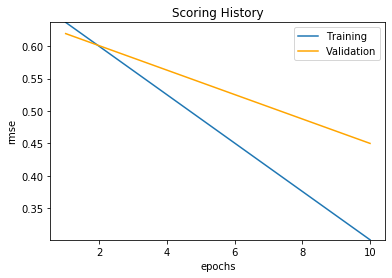

In [11]:
# plot training lostt for model
estimator.plot()

In [12]:
# get model performance on test data
baseline_model_performance = estimator.model_performance(test)
baseline_model_performance


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.20582828874635425
RMSE: 0.4536830267338136
MAE: 0.36619192224051245
RMSLE: 0.11429422201928713
Mean Residual Deviance: 0.20582828874635425


In [13]:
# print summary of model
estimator.summary()


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 373,201 weights/biases, 4.3 MB, 14,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1663,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.157668,0.347348,0,-0.000433101,0.0336049,-0.0449793,0.101184
2,,3,200,Rectifier,0,0,0,0.172989,0.249995,0,-0.014523,0.0751984,0.692984,0.251289
3,,4,1,Linear,,0,0,0.00128157,0.00151266,0,0.00169916,0.0785315,-0.00113646,1.09713e-154


## Model 2 -> Improved Model

 - Ratings seem to be normally distributed so need to specify a different 'distribution'
 - Increase hidden layers to 3
 - Increase number of neurons in each layer from default value
 - Increase epochs to `5,
 - Change stopping metric to 'mae'
 - Added drop out to hidden layers
 - Change activation to 'ReluDropOut'
 - Reduce stopping rounds to 3 (for early stopping)

In [14]:
estimator_tuned = H2ODeepLearningEstimator(variable_importances=True, #variable_importance gives feature importance (explainability)
                                    hidden=[100,100],
                                    stopping_rounds=5,                                           
                                    stopping_tolerance=0,
                                    stopping_metric='deviance',
                                    model_id ='tuned_ratings_model',
                                    #activation='rectifier',
                                    seed=seed) 
%time estimator_tuned.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 5.69 s


In [15]:
# get model performance on test data
tuned_model_performance = estimator_tuned.model_performance(test)
tuned_model_performance


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.18835170044085103
RMSE: 0.4339950465625743
MAE: 0.34618582025496997
RMSLE: 0.111439789101217
Mean Residual Deviance: 0.18835170044085103


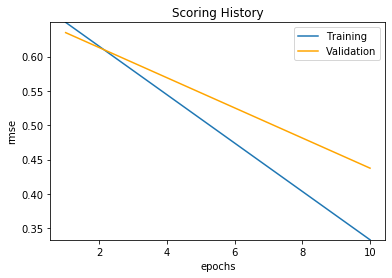

In [16]:
# plot training loss plot
estimator_tuned.plot()

In [17]:
estimator_tuned.summary()


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 176,601 weights/biases, 2.1 MB, 14,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1663,Input,0,,,,,,,,,
1,,2,100,Rectifier,0,0,0,0.169406,0.369764,0,-0.000517221,0.0352393,-0.0799606,0.198764
2,,3,100,Rectifier,0,0,0,0.0969007,0.187069,0,-0.0156589,0.105714,0.777595,0.227704
3,,4,1,Linear,,0,0,0.00107543,0.00159646,0,0.00673142,0.120329,-0.00397949,1.09713e-154


## Comparision of Results

In [18]:
import pandas as pd

maes = []
mses = []
rmses = []
models = ['Baseline','Tuned']

maes.append(baseline_model_performance.mae())
maes.append(tuned_model_performance.mae())

mses.append(baseline_model_performance.mse())
mses.append(tuned_model_performance.mse())

rmses.append(baseline_model_performance.rmse())
rmses.append(tuned_model_performance.rmse())

results_df = pd.DataFrame(data=list(zip(models, maes, mses, rmses)), columns=['Models','MAE','MSE','RMSE'])
results_df.head(10)

,Models,MAE,MSE,RMSE
0,Baseline,0.366192,0.205828,0.453683
1,Tuned,0.346186,0.188352,0.433995


## Save Models

In [20]:
h2o.save_model(model=estimator, path="coursera_models", force=True)
h2o.save_model(model=estimator_tuned, path="coursera_models", force=True)

'C:\\MachineLearning\\repos\\personel\\h2o\\coursera_models\\tuned_ratings_model'